In [ ]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import statsmodels.api as sm
from scipy.stats import skew, norm
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import ResidualsPlot
from sklearn.preprocessing import OneHotEncoder


Lab 1 contains 4 analysis questions. 
The dataset is collected from the New York government. You can find the
detailed data description (columns, building code) here: https://www.nyc.gov/site/finance/taxes/property-rolling-sales-data.page
Your goal is to fill in the missing blocks and submit the ipynb file as your lab submission to onq. You have until next Wednesday end to complete lab1, but we encourage to complete it as soon as possible.

Question 1: Load in the provided dataset 20to22NYC.csv and summarize the basic statistics. Specifically your code should answer:

1) What are the feature types and their basic statistics (using describe(include='all'))
2) How many features have missing values? 
3) What are the patterns of missing values and potential missing data reason for the top-3 most missed features.

In [ ]:
# put your code for Q1 here, you can have multiple code blocks.
#load data from a csv file and store it in a dataframe object
df = pd.read_csv("/content/20to22NYC.csv")

#display the first 10 rows of the dataframe
df.head(10)

<ipython-input-2-e62cd8cfb839>:3: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/20to22NYC.csv")


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5391,9,A5,4726 AMBOY ROAD,NaN,10312.0,1.0,0.0,1.0,3067.0,910.0,2002.0,1,A5,0.0,2020-07-02
1,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5404,46,A1,119 LENZIE STREET,NaN,10312.0,1.0,0.0,1.0,8000.0,3660.0,1998.0,1,A1,315000.0,2020-10-02
2,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5407,6,A1,118 ELMBANK STREET,NaN,10312.0,1.0,0.0,1.0,6200.0,2580.0,1975.0,1,A1,450000.0,2020-06-24
3,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5425,31,A1,7 SANDGAP STREET,NaN,10312.0,1.0,0.0,1.0,2500.0,1222.0,1925.0,1,A2,525000.0,2020-07-02
4,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,17,A5,91 EAGAN AVENUE,NaN,10312.0,1.0,0.0,1.0,1845.0,1854.0,1986.0,1,A5,480000.0,2020-01-14
5,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,83,A1,7 SEGUINE PLACE,NaN,10312.0,1.0,0.0,1.0,3989.0,2300.0,2004.0,1,A1,720000.0,2020-10-15
6,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,115,A5,44 MAY PLACE,NaN,10312.0,1.0,0.0,1.0,2475.0,2495.0,1986.0,1,A5,0.0,2020-12-11
7,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,124,A5,22 MAY PLACE,NaN,10312.0,1.0,0.0,1.0,2475.0,2495.0,1986.0,1,A5,0.0,2020-09-17
8,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,145,A5,60 SEGUINE PLACE,NaN,10312.0,1.0,0.0,1.0,1471.0,1172.0,1986.0,1,A5,429000.0,2020-11-19
9,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6211,16,A5,15 EAGAN AVENUE,NaN,10312.0,1.0,0.0,1.0,2550.0,1825.0,1986.0,1,A5,550000.0,2020-10-22


In [ ]:
#we can also check the end of the table
#display the last 10 rows of the dataframe
df.tail(10)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
258454,4,WOODSIDE,31 COMMERCIAL VACANT LAND,4,1321,15,V1,43-15 52ND STREET,NaN,11377.0,0,0,0,2000.0,0.0,NaN,4,V1,9650000.0,2021-12-15
258455,4,WOODSIDE,31 COMMERCIAL VACANT LAND,4,1321,16,V1,4315A 52ND STREET,NaN,11377.0,0,0,0,2000.0,0.0,NaN,4,V1,9650000.0,2021-12-15
258456,4,WOODSIDE,31 COMMERCIAL VACANT LAND,4,1321,17,V1,43-13 52ND STREET,NaN,11377.0,0,0,0,4000.0,0.0,NaN,4,V1,9650000.0,2021-12-15
258457,4,WOODSIDE,44 CONDO PARKING,4,1183,1036,RP,"33-30 61ST STREET, P13",P13,11377.0,NaN,1,1,NaN,NaN,2008.0,4,RP,675000.0,2021-08-30
258458,4,WOODSIDE,44 CONDO PARKING,4,1183,1038,RP,"33-30 61ST STREET, P15",P15,11377.0,NaN,1,1,NaN,NaN,2008.0,4,RP,721000.0,2021-09-17
258459,4,WOODSIDE,44 CONDO PARKING,4,1300,1114,RP,"40-45 68TH STREET, P5",P5,11377.0,NaN,1,1,NaN,NaN,2008.0,4,RP,598000.0,2021-10-15
258460,4,WOODSIDE,44 CONDO PARKING,4,1337,1229,RP,"41-52 63RD STREET, P5",P5,11377.0,NaN,1,1,NaN,NaN,2005.0,4,RP,565000.0,2021-08-18
258461,4,WOODSIDE,44 CONDO PARKING,4,2324,1109,RG,"63-14 QUEENS BOULEVARD, P-4",P-4,11377.0,NaN,1,1,NaN,NaN,2008.0,4,RG,23500.0,2021-12-08
258462,4,WOODSIDE,44 CONDO PARKING,4,2324,1152,RG,"63-14 QUEENS BOULEVARD, P-49",P-49,11377.0,NaN,1,1,NaN,NaN,2008.0,4,RG,0.0,2021-09-03
258463,4,WOODSIDE,44 CONDO PARKING,4,2324,1153,RG,"63-14 QUEENS BOULEVARD, P-50",P-50,11377.0,NaN,1,1,NaN,NaN,2008.0,4,RG,0.0,2021-09-03


In [ ]:
#display the summary of the dataframe, such as column names, data types, and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258464 entries, 0 to 258463
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   BOROUGH                         258464 non-null  int64  
 1   NEIGHBORHOOD                    258464 non-null  object 
 2   BUILDING CLASS CATEGORY         258464 non-null  object 
 3   TAX CLASS AT PRESENT            258143 non-null  object 
 4   BLOCK                           258464 non-null  int64  
 5   LOT                             258464 non-null  int64  
 6   BUILDING CLASS AT PRESENT       258143 non-null  object 
 7   ADDRESS                         258464 non-null  object 
 8   APARTMENT NUMBER                62945 non-null   object 
 9   ZIP CODE                        258445 non-null  float64
 10  RESIDENTIAL UNITS               199349 non-null  object 
 11  COMMERCIAL UNITS                162951 non-null  object 
 12  TOTAL UNITS     

In [ ]:
#create a new dataframe object that contains the descriptive statistics of the original dataframe
#include=“all” means to include both numeric and non-numeric columns
tmp = df.describe(include="all")

#display the new dataframe
tmp

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
count,258464.000000,258464,258464,258143,258464.000000,258464.000000,258143,258464,62945,258445.000000,199349.0,162951.0,205304.0,1.569960e+05,1.569960e+05,240618.000000,258464.000000,258464,2.584640e+05,258464
unique,NaN,255,44,10,NaN,NaN,174,241541,9040,NaN,446.0,116.0,475.0,NaN,NaN,NaN,NaN,173,NaN,1096
top,NaN,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,NaN,NaN,R4,55 AUSTIN PLACE,3A,NaN,1.0,0.0,1.0,NaN,NaN,NaN,NaN,R4,NaN,2022-06-30
freq,NaN,8419,57236,118084,NaN,NaN,41698,24,975,NaN,69433.0,102435.0,58318.0,NaN,NaN,NaN,NaN,41602,NaN,694
mean,2.982249,NaN,NaN,NaN,4205.347228,390.798494,NaN,NaN,NaN,10850.341763,NaN,NaN,NaN,6.006378e+03,5.488587e+03,1952.672522,1.636955,NaN,1.480856e+06,NaN
std,1.291469,NaN,NaN,NaN,3583.533963,663.856622,NaN,NaN,NaN,562.709495,NaN,NaN,NaN,1.139290e+05,4.887278e+04,36.162119,0.783537,NaN,1.049733e+07,NaN
min,1.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,10001.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,220.000000,1.000000,NaN,0.000000e+00,NaN
25%,2.000000,NaN,NaN,NaN,1251.000000,22.000000,NaN,NaN,NaN,10305.000000,NaN,NaN,NaN,1.900000e+03,1.224000e+03,1925.000000,1.000000,NaN,0.000000e+00,NaN
50%,3.000000,NaN,NaN,NaN,3273.500000,52.000000,NaN,NaN,NaN,11208.000000,NaN,NaN,NaN,2.500000e+03,1.810000e+03,1950.000000,2.000000,NaN,5.500000e+05,NaN
75%,4.000000,NaN,NaN,NaN,6251.000000,1003.000000,NaN,NaN,NaN,11355.000000,NaN,NaN,NaN,3.909250e+03,2.670000e+03,1977.000000,2.000000,NaN,9.900000e+05,NaN


In [ ]:
#We can count the features have missing values from (df.info) but to  but to make it easier, especially with a data that has a huge number of features, we can use the following method
#use the isnull() method to check which values are missing in the dataframe
#use the sum() method to count how many missing values are in each column
#use the sum() method again to count how many columns have at least one missing value
(df.isnull().sum() > 0).sum()

10

In [ ]:
# the top-3 most missed features
top_3_features_with_missing_values = df.isnull().sum().sort_values(ascending=False).head(3)
top_3_features_with_missing_values

APARTMENT NUMBER     195519
LAND SQUARE FEET     101468
GROSS SQUARE FEET    101468
dtype: int64

Summarize your answers to Q1 below, based on your analysis:



1. We have 258464  data objects and 20 attributes.
2. There are 10 attributes has NA values, (TAX CLASS AT PRESENT, BUILDING CLASS AT PRESENT, APARTMENT NUMBER, ZIP CODE, RESIDENTIAL UNITS, COMMERCIAL UNITS,TOTAL UNITS, LAND SQUARE FEET, GROSS SQUARE FEET,YEAR BUILT) . It may mean missing value or 0 value. 
3. The top_3 most missed features are :

    *   The feature "APARTMENT NUMBER" has 195519 missing values. 
        Missing data are MCAR (the reason for missing values in 
        the outcome or predictors has nothing to do with the data values themselves, whether observed or missing.)
    *   The feature "LAND SQUARE FEET" has 101468 missing values.
        Missing data are MAR (LAND SQUARE FEET has Null values when GROSS SQUARE FEET has Null values)
    * The feature "GROSS SQUARE FEE" has 101468 missing values.
      Missing data are MAR (GROSS SQUARE FEE has Null values when LAND SQUARE FEET has Null values)


#Data Preparations

<Axes: >

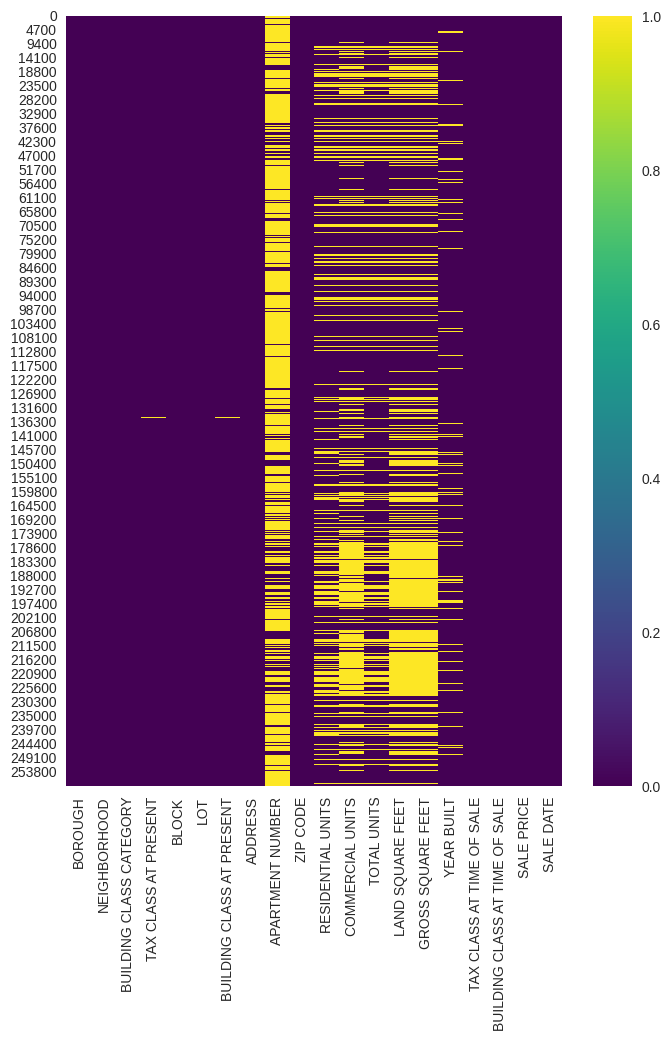

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(8,10))
sns.heatmap(df.isnull(),cmap='viridis')

In [ ]:
#missing values percentage per-column
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
percent

APARTMENT NUMBER                  0.756465
LAND SQUARE FEET                  0.392581
GROSS SQUARE FEET                 0.392581
COMMERCIAL UNITS                  0.369541
RESIDENTIAL UNITS                 0.228717
TOTAL UNITS                       0.205677
YEAR BUILT                        0.069046
TAX CLASS AT PRESENT              0.001242
BUILDING CLASS AT PRESENT         0.001242
ZIP CODE                          0.000074
SALE PRICE                        0.000000
BUILDING CLASS AT TIME OF SALE    0.000000
TAX CLASS AT TIME OF SALE         0.000000
BOROUGH                           0.000000
NEIGHBORHOOD                      0.000000
ADDRESS                           0.000000
LOT                               0.000000
BLOCK                             0.000000
BUILDING CLASS CATEGORY           0.000000
SALE DATE                         0.000000
dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258464 entries, 0 to 258463
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   BOROUGH                         258464 non-null  int64  
 1   NEIGHBORHOOD                    258464 non-null  object 
 2   BUILDING CLASS CATEGORY         258464 non-null  object 
 3   TAX CLASS AT PRESENT            258143 non-null  object 
 4   BLOCK                           258464 non-null  int64  
 5   LOT                             258464 non-null  int64  
 6   BUILDING CLASS AT PRESENT       258143 non-null  object 
 7   ADDRESS                         258464 non-null  object 
 8   APARTMENT NUMBER                62945 non-null   object 
 9   ZIP CODE                        258445 non-null  float64
 10  RESIDENTIAL UNITS               199349 non-null  object 
 11  COMMERCIAL UNITS                162951 non-null  object 
 12  TOTAL UNITS     

In [ ]:
#I will drop APARTMENT NUMBER, I think it will not useful for us 
df.drop(['APARTMENT NUMBER'], axis=1 , inplace = True)

In [ ]:
#fill the null values in LAND SQUARE FEET column with the mean value of the column
df['LAND SQUARE FEET'].fillna(df['LAND SQUARE FEET'].mean(), inplace=True)
#fill the null values in GROSS SQUARE FEET column with the mean value of the column
df['GROSS SQUARE FEET'].fillna(df['GROSS SQUARE FEET'].mean(), inplace=True)
#replace the null values in that column with the string “0”
df['RESIDENTIAL UNITS'].fillna(df['RESIDENTIAL UNITS'].mode(),inplace=True)
#replace the null values in  TOTAL UNITS column with the string “0”
df['TOTAL UNITS'].fillna("TOTAL UNITS", inplace=True) 
#replace the null values in that column with “0”
df['YEAR BUILT'].fillna(0, inplace=True) 


In [ ]:
#Convert the column ‘YEAR BUILT’ to an integer type to remove 0 after the value
df['YEAR BUILT']= df['YEAR BUILT'].astype('int64')

In [ ]:
#replace the null values in that column with the string “0”
df['COMMERCIAL UNITS'].fillna("0", inplace=True) 
#replace the null values in that column with the string “0”
df['TAX CLASS AT PRESENT'].fillna("0", inplace=True) 
#replace the null values in that column with the string “0”
df['BUILDING CLASS AT PRESENT'].fillna("0", inplace=True) 
#replace the null values in that column with “0”
df['ZIP CODE'].fillna(0, inplace=True) 

In [ ]:
#Convert the column ‘ZIP CODE’ to an integer type to remove 0 after the value
df['ZIP CODE']= df['ZIP CODE'].astype('int64')



*Question* 2: Check the normality of the target variable, i.e., 'SALE PRICE', using both graphical and statistical test methods.

#Graphical test method

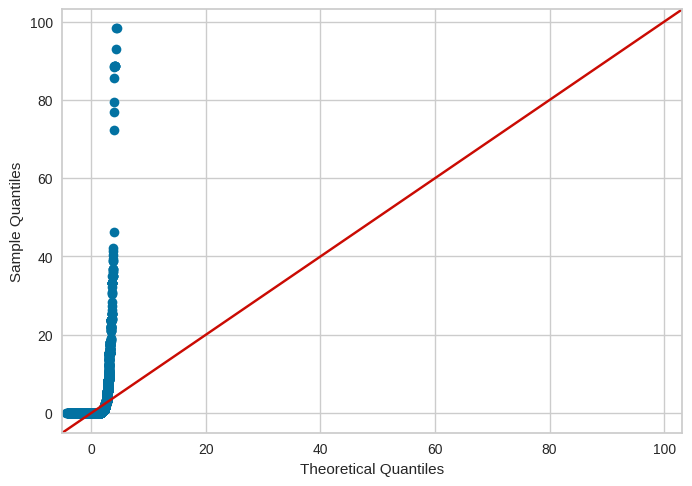

<ipython-input-16-abff5e3d7d60>:24: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




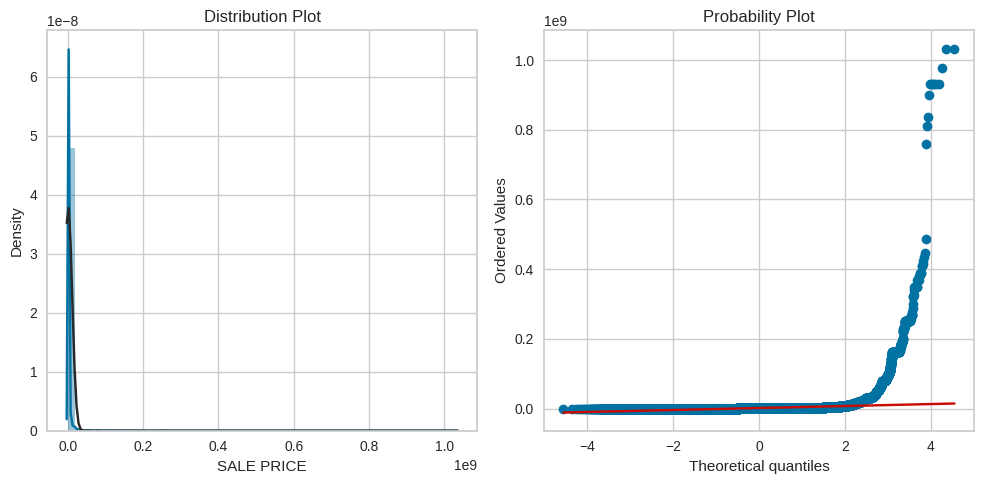

In [ ]:
# put your code for Q2 here, you can have multiple code blocks.
# let's perform several basic statistical tests. 
# First is the normality test.  
# Let's try graphical methods first, using QQ plot and freuqency distribution. 

#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(df['SALE PRICE'], line='45', fit = True)
plt.show()

#frequency plot
data = px.data.tips()
fig = px.histogram(df, x="SALE PRICE")
fig.show()


# another way to perform graphical method.
def normality_plot(X):
    """
    1. Draw distribution plot with normal distribution fitted curve
    2. Draw Quantile-Quantile plot 
    """
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    sns.distplot(X, fit=norm, ax=axes[0])
    axes[0].set_title('Distribution Plot')
    #`probplot` generates a probability plot, which should not be confused with a Q-Q or a P-P plot.  Statsmodels has more extensive functionality of this type, see ``statsmodels.api.ProbPlot``
    axes[1] = stats.probplot((X), plot=plt)
    plt.tight_layout()

normality_plot(df['SALE PRICE'])



#Statistical test methods

The Shapiro-Wilk test tests the null hypothesis that the data is normally distributed. If the p-value of the Shapiro-Wilk test is less than 0.05, then we can reject the null hypothesis and conclude that the data is not normally distributed.



In [ ]:
#seems that 'SALE PRICE' does not follow normal distribution, let's perform statistical test.
# perform the Shapiro-Wilk test on the ‘SALE PRICE’ variable
w, pvalue = stats.shapiro(df['SALE PRICE']) #p value obtained from the Shapiro-Wilk test is significant (p < 0.05), we conclude that the data is not normally distribute
print("p = {:g}".format(pvalue))

# D’Agostino-Pearson’s K² test, ref https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html
k2, p = stats.normaltest(df['SALE PRICE'])
alpha = 1e-3
print("p = {:g}".format(p))
p = 8.4713e-19
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0
p = 0
The null hypothesis can be rejected


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning:

p-value may not be accurate for N > 5000.



Summarize your answers to Q2 below, based on your analysis:


1. The points in the Q-Q chart are far from a straight line, and this indicates that the "sale price" variable is not normal. ('SALE PRICE' does not follow normal distribution)
This means that we should be careful when using parametric statistical tests on this variable.
2. If the p value is less than the significance level (usually 0.05), you can reject the null hypothesis that the 'sale price' variable is normally distributed.
3. we can reject the null hypothesis and conclude that the 'SALE PRICE' variable is not normally distributed.


Question 3: Design hypothesis test to answer the following two questions:

"Has the NYC real estate market changed following the declaration of the COVID-19 pandemic in March of 2020?"

"Do properties in Manhattan sell at higher prices than properties elsewhere?"

For each question, you need to give the null hypothesis $H_0$ and alternative hypothesis $H_1$


1. Has the NYC real estate market changed following the declaration of the COVID-19 pandemic in March of 2020?


* Null hypothesis H0: There is no significant difference in the NYC real estate market before and after the declaration of the COVID-19 pandemic.

* Alternative hypothesis H1: There is a significant difference in the NYC real estate market before and after the declaration of the COVID-19 pandemic.

#for the Q1
1. Collect data on the prices of NYC real estate  before March 2020 and after March 2020 from a representative sample of properties.
2. Perform a two-sample t-test to compare the means of the two groups.
3. Decide whether to reject or fail to reject H0 based on the p-value and a significance level of 0.05.
4. Present your findings by reporting the test statistic, the p-value, and your conclusion.

In [ ]:
# put your code for Q3 here, you can have multiple code blocks.
# Split the data into before and after the COVID-19 pandemic
before_COVID = df[df['SALE DATE'] < '2020-03-01']
after_COVID = df[df['SALE DATE'] >= '2020-03-01']

In [ ]:
# Compute the mean sale price for each group
before_mean = before_COVID['SALE PRICE'].mean()
after_mean = after_COVID['SALE PRICE'].mean()

In [ ]:
# Perform a two-sample t-test
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(before_COVID['SALE PRICE'], after_COVID['SALE PRICE'])

In [ ]:
# Print the mean sale price and t-test results
print(f"Before COVID Mean Sale Price: {before_mean:.2f}")
print(f"After COVID Mean Sale Price: {after_mean:.2f}")
print(f"T-Stat: {t_stat:.2f}, P-Value: {p_value:.3f}")

Before COVID Mean Sale Price: 1677444.16
After COVID Mean Sale Price: 1469598.79
T-Stat: 2.28, P-Value: 0.023


2. Do properties in Manhattan sell at higher prices than properties elsewhere?
* H0: There is no significant difference in the mean sale price of properties in Manhattan and properties outside of Manhattan.

* H1: Properties in Manhattan have a significantly higher mean sale price than properties outside of Manhattan.

#For the Q2 
1. Collect data on the prices of Manhattan and non-Manhattan real estate from a representative sample of properties.
2. Perform a one-sided two-sample t-test to compare the means of the two groups.
3. Decide whether to reject or fail to reject H0 based on the p-value and a significance level of 0.05.
4. Present your findings by reporting the test statistic, the p-value, and your conclusion.

In [ ]:
# Split the data into Manhattan and Non-Manhattan properties
#from the data Manhattan = 1
manhattan_properties = df[df['BOROUGH'] == 1]
non_manhattan_properties = df[df['BOROUGH'] != 1]

In [ ]:
# Compute the mean sale price for each group
manhattan_mean = manhattan_properties['SALE PRICE'].mean()
non_manhattan_mean = non_manhattan_properties['SALE PRICE'].mean()

In [ ]:
# Perform a two-sample t-test
t_stat, p_value = ttest_ind(manhattan_properties['SALE PRICE'], non_manhattan_properties['SALE PRICE'])

In [ ]:
# Print the mean sale price and t-test results
print(f"Manhattan Mean Sale Price: {manhattan_mean:.2f}")
print(f"Non-Manhattan Mean Sale Price: {non_manhattan_mean:.2f}")
print(f"T-Stat: {t_stat:.2f}, P-Value: {p_value:.3f}")

Manhattan Mean Sale Price: 3200660.90
Non-Manhattan Mean Sale Price: 994711.59
T-Stat: 44.45, P-Value: 0.000


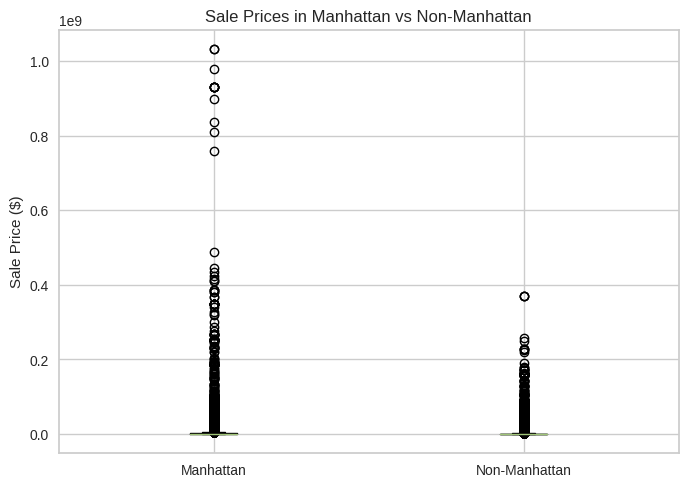

In [ ]:
# Create a box plot
data = [manhattan_properties['SALE PRICE'], non_manhattan_properties['SALE PRICE']]
fig, ax = plt.subplots()
ax.boxplot(data, labels=['Manhattan', 'Non-Manhattan'])
plt.title("Sale Prices in Manhattan vs Non-Manhattan")
plt.ylabel("Sale Price ($)")
plt.show()

Summarize your answers to Q3 below, based on your analysis:


*   the p-value for the first hypothesis test is less than 0.05, we can reject the null hypothesis and conclude that the NYC real estate market has changed following the declaration of the COVID-19 pandemic. 
*  the p-value for the second hypothesis test is less than 0.05, we can reject the null hypothesis and conclude that the Properties in Manhattan have a significantly higher mean sale price than properties outside of Manhattan.



# Question 4: Perform a multiple linear regression analysis on the given data, considering impact of missing values. Note, you need to properly transfer categorical features to numerical features first.
Report the features that are significant relevant to sale price based on the results of your regression model.

In [ ]:
# I have filled in the null values ​​in the previous steps
#SO, let's to drop irrelevant columns
df.drop(['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'ADDRESS', 'BUILDING CLASS AT TIME OF SALE'], axis=1 , inplace = True)


In [ ]:
df['BUILDING CLASS AT PRESENT']= df['BUILDING CLASS AT PRESENT'].astype('category')
df['RESIDENTIAL UNITS']= pd.to_numeric(df['RESIDENTIAL UNITS'] , errors ='coerce').astype('float64')
df['COMMERCIAL UNITS']= pd.to_numeric(df['COMMERCIAL UNITS'] , errors ='coerce').astype('float64')
df['TOTAL UNITS']= pd.to_numeric(df['TOTAL UNITS'], errors ='coerce').astype('float64')


In [ ]:
# Converting categorical features into numerical using one-hot encoding
enc = OneHotEncoder(handle_unknown='ignore')
col=['BUILDING CLASS AT PRESENT']
enc.fit(df[col])
x= enc.transform(df[col])
  
enc_data = pd.DataFrame(x.toarray())
New_df = df.join(enc_data)
print(New_df)


        BOROUGH  BLOCK   LOT BUILDING CLASS AT PRESENT  ZIP CODE  \
0             5   5391     9                        A5     10312   
1             5   5404    46                        A1     10312   
2             5   5407     6                        A1     10312   
3             5   5425    31                        A1     10312   
4             5   6205    17                        A5     10312   
...         ...    ...   ...                       ...       ...   
258459        4   1300  1114                        RP     11377   
258460        4   1337  1229                        RP     11377   
258461        4   2324  1109                        RG     11377   
258462        4   2324  1152                        RG     11377   
258463        4   2324  1153                        RG     11377   

        RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  \
0                     1.0               0.0          1.0       3067.000000   
1                     1.0  

In [ ]:

 New_df.drop( ['BUILDING CLASS AT PRESENT'], axis=1 , inplace = True)
 New_df.drop( ['RESIDENTIAL UNITS'], axis=1 , inplace = True)


In [ ]:
# Converting categorical features into numerical using one-hot encoding
# col=['BUILDING CLASS AT PRESENT','RESIDENTIAL UNITS','COMMERCIAL UNITS','TOTAL UNITS','SALE DATE']
# df = pd.get_dummies(df, columns=col)


In [ ]:
import datetime as dt
#Convert the ‘SALE DATE’ column to a datetime format
New_df['SALE DATE'] = pd.to_datetime(New_df['SALE DATE'])
#Convert the ‘SALE DATE’ column to an ordinal number (the number of days since January 1, 0001)
New_df['SALE DATE']=New_df['SALE DATE'].map(dt.datetime.toordinal)

In [ ]:
New_df['SALE DATE'].astype('float64')

0         737608.0
1         737700.0
2         737600.0
3         737608.0
4         737438.0
            ...   
258459    738078.0
258460    738020.0
258461    738132.0
258462    738036.0
258463    738036.0
Name: SALE DATE, Length: 258464, dtype: float64

In [ ]:
New_df.isna().sum()

BOROUGH             0
BLOCK               0
LOT                 0
ZIP CODE            0
COMMERCIAL UNITS    2
                   ..
170                 0
171                 0
172                 0
173                 0
174                 0
Length: 187, dtype: int64

In [ ]:
New_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258464 entries, 0 to 258463
Columns: 187 entries, BOROUGH to 174
dtypes: float64(180), int64(7)
memory usage: 368.7 MB


In [ ]:
New_df = New_df.dropna()

In [ ]:
New_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205299 entries, 0 to 258463
Columns: 187 entries, BOROUGH to 174
dtypes: float64(180), int64(7)
memory usage: 294.5 MB


In [ ]:
# Splitting the dataset into features and target variable
X = New_df.drop(['SALE PRICE'] , axis=1) 
y = New_df['SALE PRICE']

In [ ]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Performing multiple linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train.values, y_train.values)

LinearRegression()

In [ ]:
# Feature importance based on model coefficients
#Create a pandas series with the model coefficients and the feature names as the index
feature_importance = pd.Series(model.coef_, index=X_train.columns)
#Sort the series by the absolute values of the coefficients in descending order
feature_importance = feature_importance.abs().sort_values(ascending=False)
#Print the series
print(feature_importance)

78     3.983545e+08
172    9.419819e+07
152    8.171265e+07
37     5.795550e+07
76     5.142019e+07
           ...     
69     2.521686e-02
25     1.841040e-02
151    1.242821e-02
127    8.176973e-03
9      4.724329e-04
Length: 186, dtype: float64


In [ ]:
#Using significance testing methodsto determine the significance of each feature to the model.
#Import the statsmodels library for statistical modeling
import statsmodels.api as sm
X_train_ = sm.add_constant(X_train)
#Create an ordinary least squares (OLS) regression model 
model_ = sm.OLS(y_train, X_train_)
#Fit the model to the data and get the results
results = model_.fit()
#Print a summary of the results, including the coefficients and p-values
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             SALE PRICE   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     184.9
Date:                Thu, 18 May 2023   Prob (F-statistic):               0.00
Time:                        18:36:42   Log-Likelihood:            -2.8818e+06
No. Observations:              164239   AIC:                         5.764e+06
Df Residuals:                  164060   BIC:                         5.766e+06
Df Model:                         178                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Summarize your answers to Q4 below, based on your analysis:

* I have completed the data processing , Converting categorical features into numerical using one-hot encoding , Convert the ‘SALE DATE’ column to an ordinal number (the number of days since January 1, 0001) and drop the null values 
* split the data into train and test split 
* I build the model and fit it.
* I calculated the feature importance of a linear regression  model based on the model coefficients.
*   The output of the feature importance will show the importance of the features relative to the sale price, with the most important feature at the top.
* The output shows that the 78 feature is the most important feature in the model, followed by the 172 feature. The least important feature is the 9 feature.
* This information can be used to improve the model by selecting the most important features or by developing new features that are based on the important features.
* I determined the significance of each feature in a linear regression model using significance testing methods
*   From the summary table, the p-values of the coefficients can tell us whether the coefficients are statistically significant to the model or not. A p-value below 0.05 suggests that the coefficient is significant.

* the BOROUGH feature is statistically significant, with a p-value of 0.000. 
This means that there is less than a 0.1% chance that the observed results could have occurred by chance. we can conclude that the BOROUGH feature is a significant predictor of the target variable.

* In general, a p-value of less than 0.05 is considered to be statistically significant. This means that there is less than a 5% chance that the observed results could have occurred by chance. A p-value greater than 0.05 is not considered to be statistically significant. This means that there is more than a 5% chance that the observed results could have occurred by chance.

* This information can be used to improve the model by selecting the most important features or by developing new features that are based on the important features.

